# Generation and Demand

Analyze electricity generation mix and demand data from the Spanish grid.

Reference: https://www.esios.ree.es/es/balance

In [1]:
from esios import ESIOSClient

client = ESIOSClient()

## Key generation indicators

| ID    | Description |
|-------|-------------|
| 73    | Wind generation |
| 74    | Nuclear generation |
| 79    | Hydro generation |
| 10008 | Combined cycle |
| 10010 | Solar PV generation |
| 10063 | Total renewable generation |

In [2]:
ids = [73, 74, 79, 10008, 10010, 10063]

## Fetch generation data

In [3]:
df = client.indicators.compare(
    ids,
    start="2025-01-01",
    end="2025-01-07",
)
df

,Generación programada P48 Turbinación bombeo,Generación programada P48 Nuclear,Generación programada P48 Ciclo combinado,Generación programada P48 Carbón,Generación programada P48 Eólica,Generación programada P48 UGH + no UGH
datetime,,,,,,
2025-01-01 00:00:00+01:00,39.250,1772.475,1922.550,108.75,656.375,720.300
2025-01-01 00:15:00+01:00,23.500,1772.475,1876.300,108.75,658.875,720.300
2025-01-01 00:30:00+01:00,21.000,1772.475,1828.550,108.75,660.875,720.300
2025-01-01 00:45:00+01:00,21.000,1772.475,1785.300,101.25,665.125,720.300
2025-01-01 01:00:00+01:00,21.000,1771.975,1784.525,76.25,703.250,635.000
...,...,...,...,...,...,...
2025-01-07 22:45:00+01:00,59.475,1770.050,505.250,60.75,3810.825,859.950
2025-01-07 23:00:00+01:00,304.975,1769.800,470.125,60.75,3734.075,806.225
2025-01-07 23:15:00+01:00,152.975,1769.800,468.375,60.75,3737.975,741.225


## Generation mix stacked area chart

<Axes: title={'center': 'Generation Mix (MW) — January 2025'}, xlabel='datetime'>

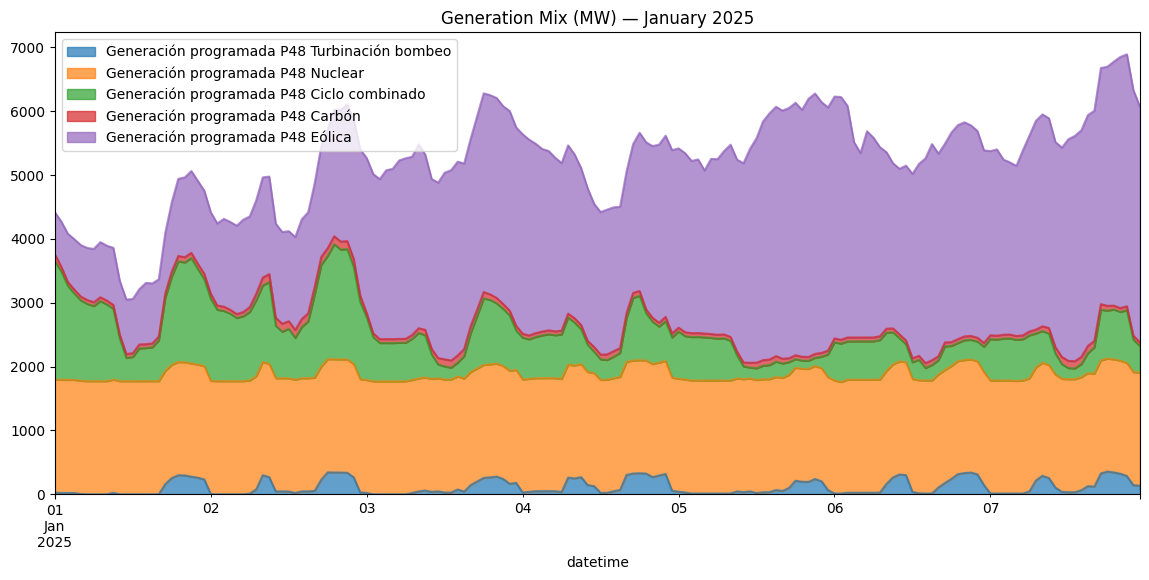

In [4]:
gen_cols = [c for c in df.columns if c != df.columns[-1]]
df[gen_cols].resample("h").mean().plot.area(
    figsize=(14, 6),
    title="Generation Mix (MW) — January 2025",
    alpha=0.7,
)

## Daily totals

In [5]:
df_daily = df.resample("D").mean().round(1)
df_daily

,Generación programada P48 Turbinación bombeo,Generación programada P48 Nuclear,Generación programada P48 Ciclo combinado,Generación programada P48 Carbón,Generación programada P48 Eólica,Generación programada P48 UGH + no UGH
datetime,,,,,,
2025-01-01 00:00:00+01:00,130.8,1772.3,1140.5,69.0,940.3,650.8
2025-01-02 00:00:00+01:00,156.1,1772.4,1187.1,106.0,1621.4,778.9
2025-01-03 00:00:00+01:00,118.6,1769.3,628.3,83.2,2862.2,765.2
2025-01-04 00:00:00+01:00,155.7,1769.7,609.0,67.7,2594.1,772.9
2025-01-05 00:00:00+01:00,70.9,1769.5,381.0,66.4,3372.3,557.3
2025-01-06 00:00:00+01:00,136.2,1768.6,421.5,62.1,3144.6,589.1
2025-01-07 00:00:00+01:00,138.3,1769.5,532.2,78.2,3362.3,779.3


## Export to CSV

In [6]:
df.to_csv("generation_2025_01.csv")